# Softmax

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [223]:
iris = datasets.load_iris()

In [224]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)

In [225]:
x[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [227]:
x_train[:10], x_test[:10]

(array([[-0.17367395, -0.59237301,  4.1       ,  1.3       ],
        [ 0.91683689, -0.13197948,  4.4       ,  1.4       ],
        [ 0.4321654 , -0.59237301,  4.8       ,  1.8       ],
        [ 0.55333328,  0.55861082,  4.7       ,  1.6       ],
        [ 1.15917263, -0.59237301,  4.8       ,  1.4       ],
        [-0.05250608, -0.82256978,  3.9       ,  1.2       ],
        [ 0.31099753, -0.36217625,  4.7       ,  1.4       ],
        [-1.02184904,  0.32841405,  1.2       ,  0.2       ],
        [ 0.67450115,  0.32841405,  4.5       ,  1.5       ],
        [-0.7795133 ,  1.01900435,  1.5       ,  0.2       ]]),
 array([[-1.14301691,  1.24920112,  1.4       ,  0.1       ],
        [ 0.67450115, -0.59237301,  5.6       ,  2.2       ],
        [ 2.4920192 ,  1.70959465,  6.4       ,  2.        ],
        [-0.41600969,  1.01900435,  1.3       ,  0.2       ],
        [-1.14301691, -1.28296331,  4.5       ,  1.7       ],
        [-1.02184904, -2.43394714,  3.5       ,  1.        ],
      

In [228]:
y_train[:10], y_test[:10]

(array([[1],
        [1],
        [2],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0]]),
 array([[0],
        [2],
        [2],
        [0],
        [2],
        [1],
        [2],
        [1],
        [1],
        [1]]))

In [229]:
y_enc = (np.arange(np.max(y_train.flatten()) + 1) == y_train.flatten()[:, None]).astype(float)

y_enc[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [230]:
def predict(x, w):
    return (np.dot(x,w) + bias)

In [231]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

In [232]:
def to_classlabel(z):
    return z.argmax(axis=1)

In [233]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

In [234]:
def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

In [235]:
def optimizar(x_train, smax, y_enc):
    return - np.dot(x_train.T, (y_enc - smax))

In [236]:
x_train.shape

(112, 4)

In [237]:
theta_set = np.random.rand(1,4)
theta_ver = np.random.rand(1,4)    
theta_vir = np.random.rand(1,4)
theta_all = np.concatenate((theta_set,theta_ver,theta_vir)).reshape(4,3)


eta = 0.001
max_iter = 20000
cost_smax = []
for i in range(0, max_iter):
    vector_pos_train = predict(x_train, theta_all)
    
    smax = softmax(vector_pos_train)
    theta_all =  theta_all - eta*(optimizar(x_train, smax, y_enc))
    J_cost = cost(smax, y_enc)
    cost_smax.append(J_cost)

theta_all

array([[-6.40490538,  1.95497448,  4.95440437],
       [ 4.45118839, -0.6172318 , -1.80690659],
       [ 0.32480614,  2.24790132, -1.30736629],
       [-1.84269661, -3.11448788,  6.10067689]])

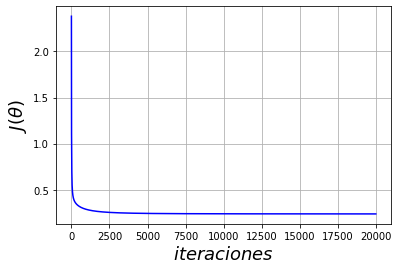

In [238]:
plt.plot(np.arange(max_iter), cost_smax, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [239]:
vector_pos_test = predict(x_test, theta_all)
    
smax_pred = softmax(vector_pos_test)
y_pred = to_classlabel(smax_pred)

In [240]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 14,  2],
       [ 0,  3, 10]], dtype=int64)

In [241]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

0.868421052631579

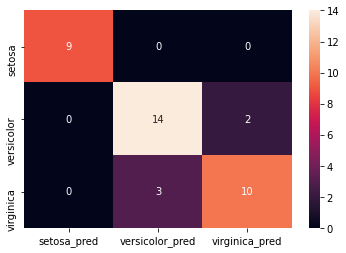

In [242]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
f = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [243]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [244]:
print(classification_report(y_test,  y_pred, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.82      0.88      0.85        16
   virginica       0.83      0.77      0.80        13

    accuracy                           0.87        38
   macro avg       0.89      0.88      0.88        38
weighted avg       0.87      0.87      0.87        38

